In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
customized_path = "/content/drive/Shareddrives/Urban Computing Project/"
sys.path.append(customized_path)

In [3]:
import pandas as pd
from dateutil.parser import parse 
import bamboolib as bam

ModuleNotFoundError: ignored

In [ ]:
time_data = pd.read_csv('/content/drive/Shareddrives/Urban Computing Project/datasets/mta_1706.csv', usecols=['ExpectedArrivalTime', 'ScheduledArrivalTime'], parse_dates= True)

In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:59,24:06:14
1,2017-06-01 00:03:56,23:58:02
2,2017-06-01 00:03:56,24:00:53
3,2017-06-01 00:04:03,24:03:00
4,2017-06-01 00:03:56,23:59:38


In [ ]:
time_data.shape

(6730856, 2)

In [ ]:
time_data.dtypes

ExpectedArrivalTime     object
ScheduledArrivalTime    object
dtype: object

In [ ]:
time_data.describe()

,ExpectedArrivalTime,ScheduledArrivalTime
count,5858554,6558477
unique,733393,93603
top,2017-06-14 11:36:23,08:47:00
freq,1090,2626


In [ ]:
time_data.isnull().sum()

ExpectedArrivalTime     872302
ScheduledArrivalTime    172379
dtype: int64

In [ ]:
time_data = time_data.dropna()

In [ ]:
time_data.shape

(5804742, 2)

In [ ]:
def aux_chng_time(a):
  x = str(a % 24)
  if len(x) == 1:
    x = '0' + x
    return x
  else:
    return x

def change_time_format(s):
  a = str(s)[:2]
  if int(a) >= 24:
    x = aux_chng_time(int(a))
    s = x + str(s)[2:]
    return s
  else:
    return str(s)

time_data['ScheduledArrivalTime'] = time_data['ScheduledArrivalTime'].apply(change_time_format)
# time_data['ScheduledArrivalTime'].apply(lambda x: (x = "00" + x[2:] if x[:2] == '24'))

In [ ]:
time_data['ScheduledArrivalTime'].head()

0    00:06:14
1    23:58:02
2    00:00:53
3    00:03:00
4    23:59:38
Name: ScheduledArrivalTime, dtype: object

In [ ]:
time_data['ExpectedArrivalTime'] = pd.to_datetime(time_data['ExpectedArrivalTime'],format='%Y-%m-%d', errors='coerce')
time_data['ScheduledArrivalTime'] = pd.to_datetime(time_data['ScheduledArrivalTime'])

In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:59,2021-11-16 00:06:14
1,2017-06-01 00:03:56,2021-11-16 23:58:02
2,2017-06-01 00:03:56,2021-11-16 00:00:53
3,2017-06-01 00:04:03,2021-11-16 00:03:00
4,2017-06-01 00:03:56,2021-11-16 23:59:38


In [ ]:
time_data['Date'] = time_data['ExpectedArrivalTime'].dt.date
time_data['Time'] = time_data['ScheduledArrivalTime'].dt.time

In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalTime,Date,Time
0,2017-06-01 00:03:59,2021-11-16 00:06:14,2017-06-01,00:06:14
1,2017-06-01 00:03:56,2021-11-16 23:58:02,2017-06-01,23:58:02
2,2017-06-01 00:03:56,2021-11-16 00:00:53,2017-06-01,00:00:53
3,2017-06-01 00:04:03,2021-11-16 00:03:00,2017-06-01,00:03:00
4,2017-06-01 00:03:56,2021-11-16 23:59:38,2017-06-01,23:59:38


In [ ]:
time_data['ScheduledArrivalandTime'] = time_data.apply(lambda x : pd.datetime.combine(x['Date'],x['Time']),1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalTime,Date,Time,ScheduledArrivalandTime
0,2017-06-01 00:03:59,2021-11-16 00:06:14,2017-06-01,00:06:14,2017-06-01 00:06:14
1,2017-06-01 00:03:56,2021-11-16 23:58:02,2017-06-01,23:58:02,2017-06-01 23:58:02
2,2017-06-01 00:03:56,2021-11-16 00:00:53,2017-06-01,00:00:53,2017-06-01 00:00:53
3,2017-06-01 00:04:03,2021-11-16 00:03:00,2017-06-01,00:03:00,2017-06-01 00:03:00
4,2017-06-01 00:03:56,2021-11-16 23:59:38,2017-06-01,23:59:38,2017-06-01 23:59:38


In [ ]:
time_data['ScheduledArrivalandTime'] = pd.to_datetime(time_data['ScheduledArrivalandTime'],format='%Y-%m-%d', errors='coerce')
# time_data["Time Difference"] = time_data['ScheduledArrivalandTime'] - time_data['ExpectedArrivalTime']

In [ ]:
time_data.dtypes

ExpectedArrivalTime        datetime64[ns]
ScheduledArrivalTime       datetime64[ns]
Date                               object
Time                               object
ScheduledArrivalandTime    datetime64[ns]
dtype: object

In [ ]:
# time_data['time_bucket'] = time_data['ScheduledArrivalandTime']

In [ ]:
# time_data.resample('10T', on='time_bucket').sum()

In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalTime,Date,Time,ScheduledArrivalandTime
0,2017-06-01 00:03:59,2021-11-16 00:06:14,2017-06-01,00:06:14,2017-06-01 00:06:14
1,2017-06-01 00:03:56,2021-11-16 23:58:02,2017-06-01,23:58:02,2017-06-01 23:58:02
2,2017-06-01 00:03:56,2021-11-16 00:00:53,2017-06-01,00:00:53,2017-06-01 00:00:53
3,2017-06-01 00:04:03,2021-11-16 00:03:00,2017-06-01,00:03:00,2017-06-01 00:03:00
4,2017-06-01 00:03:56,2021-11-16 23:59:38,2017-06-01,23:59:38,2017-06-01 23:59:38


In [ ]:
time_data.dtypes

ExpectedArrivalTime        datetime64[ns]
ScheduledArrivalTime       datetime64[ns]
Date                               object
Time                               object
ScheduledArrivalandTime    datetime64[ns]
dtype: object

In [ ]:
time_data["Time Difference"] = (time_data['ExpectedArrivalTime'] - time_data['ScheduledArrivalandTime'])

In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalTime,Date,Time,ScheduledArrivalandTime,Time Difference
0,2017-06-01 00:03:59,2021-11-16 00:06:14,2017-06-01,00:06:14,2017-06-01 00:06:14,-1 days +23:57:45
1,2017-06-01 00:03:56,2021-11-16 23:58:02,2017-06-01,23:58:02,2017-06-01 23:58:02,-1 days +00:05:54
2,2017-06-01 00:03:56,2021-11-16 00:00:53,2017-06-01,00:00:53,2017-06-01 00:00:53,0 days 00:03:03
3,2017-06-01 00:04:03,2021-11-16 00:03:00,2017-06-01,00:03:00,2017-06-01 00:03:00,0 days 00:01:03
4,2017-06-01 00:03:56,2021-11-16 23:59:38,2017-06-01,23:59:38,2017-06-01 23:59:38,-1 days +00:04:18


Issue here is around dates-

To calculate the time difference between expected and scheduled time, we need to have dates along with time. Main problem comes around 12:00 am time. For example, if the scheduled time is 23:56 and bus is late and expected time is 00:04 next day, but since we are copying dates from expected arrival time column, we will have scheduled time as 23:56 on date d and expected time as 00:04 on date d, meaning bus is early by 23hr and 52min.

I tried to resolve it in later part of this file, which is not too fine either and needs some refinement, but it is the one I could come up with at this point. However, if you can think of other similar issues which could surface, please point out to me.

In [ ]:
time_data.dtypes

ExpectedArrivalTime         datetime64[ns]
ScheduledArrivalTime        datetime64[ns]
Date                                object
Time                                object
ScheduledArrivalandTime     datetime64[ns]
Time Difference            timedelta64[ns]
dtype: object

In [ ]:
# time_data.drop(['Date','Time'], axis = 1)

In [ ]:
def tm_diff(a,b):
  if b > a:
    return b-a
  else:
    return -1

time_data['lateby'] = time_data.apply(lambda x: tm_diff(x['ScheduledArrivalandTime'], x['ExpectedArrivalTime']), axis=1)

In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalTime,Date,Time,ScheduledArrivalandTime,Time Difference,lateby
0,2017-06-01 00:03:59,2021-11-16 00:06:14,2017-06-01,00:06:14,2017-06-01 00:06:14,-1 days +23:57:45,-1
1,2017-06-01 00:03:56,2021-11-16 23:58:02,2017-06-01,23:58:02,2017-06-01 23:58:02,-1 days +00:05:54,-1
2,2017-06-01 00:03:56,2021-11-16 00:00:53,2017-06-01,00:00:53,2017-06-01 00:00:53,0 days 00:03:03,0 days 00:03:03
3,2017-06-01 00:04:03,2021-11-16 00:03:00,2017-06-01,00:03:00,2017-06-01 00:03:00,0 days 00:01:03,0 days 00:01:03
4,2017-06-01 00:03:56,2021-11-16 23:59:38,2017-06-01,23:59:38,2017-06-01 23:59:38,-1 days +00:04:18,-1


In [ ]:
time_data.dtypes

ExpectedArrivalTime         datetime64[ns]
ScheduledArrivalTime        datetime64[ns]
Date                                object
Time                                object
ScheduledArrivalandTime     datetime64[ns]
Time Difference            timedelta64[ns]
lateby                              object
dtype: object

In [ ]:
time_data['Time Difference in Seconds'] = time_data['Time Difference'].dt.total_seconds()

In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalTime,Date,Time,ScheduledArrivalandTime,Time Difference,lateby,Time Difference in Seconds
0,2017-06-01 00:03:59,2021-11-16 00:06:14,2017-06-01,00:06:14,2017-06-01 00:06:14,-1 days +23:57:45,-1,-135.0
1,2017-06-01 00:03:56,2021-11-16 23:58:02,2017-06-01,23:58:02,2017-06-01 23:58:02,-1 days +00:05:54,-1,-86046.0
2,2017-06-01 00:03:56,2021-11-16 00:00:53,2017-06-01,00:00:53,2017-06-01 00:00:53,0 days 00:03:03,0 days 00:03:03,183.0
3,2017-06-01 00:04:03,2021-11-16 00:03:00,2017-06-01,00:03:00,2017-06-01 00:03:00,0 days 00:01:03,0 days 00:01:03,63.0
4,2017-06-01 00:03:56,2021-11-16 23:59:38,2017-06-01,23:59:38,2017-06-01 23:59:38,-1 days +00:04:18,-1,-86142.0


In [ ]:
time_data = time_data.drop(['Date','Time','ScheduledArrivalTime'], axis = 1)

In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalandTime,Time Difference,lateby,Time Difference in Seconds
0,2017-06-01 00:03:59,2017-06-01 00:06:14,-1 days +23:57:45,-1,-135.0
1,2017-06-01 00:03:56,2017-06-01 23:58:02,-1 days +00:05:54,-1,-86046.0
2,2017-06-01 00:03:56,2017-06-01 00:00:53,0 days 00:03:03,0 days 00:03:03,183.0
3,2017-06-01 00:04:03,2017-06-01 00:03:00,0 days 00:01:03,0 days 00:01:03,63.0
4,2017-06-01 00:03:56,2017-06-01 23:59:38,-1 days +00:04:18,-1,-86142.0


In [ ]:
time_data.dtypes

ExpectedArrivalTime            datetime64[ns]
ScheduledArrivalandTime        datetime64[ns]
Time Difference               timedelta64[ns]
lateby                                 object
Time Difference in Seconds            float64
dtype: object

In [ ]:
time_data.isnull().sum()


ExpectedArrivalTime           374
ScheduledArrivalandTime       374
Time Difference               374
lateby                          0
Time Difference in Seconds    374
dtype: int64

In [ ]:
time_data = time_data.dropna()

In [ ]:
time_data.isnull().sum()

ExpectedArrivalTime           0
ScheduledArrivalandTime       0
Time Difference               0
lateby                        0
Time Difference in Seconds    0
dtype: int64

In [ ]:
def correct_time_difference(a):
  if a > 0:
    return 'late by ' + str(int(a)) + ' seconds'
  elif a == 0:
    return 'exactly as scheduled'
  else:
    if a < -80000:
      x = 86400 + a
      return 'late by '+  str(int(x)) + ' seconds'
    else:
      return 'early by ' + str(int(-a)) + ' seconds'

time_data['late/early'] = time_data['Time Difference in Seconds'].apply(correct_time_difference)


In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalandTime,Time Difference,lateby,Time Difference in Seconds,late/early
0,2017-06-01 00:03:59,2017-06-01 00:06:14,-1 days +23:57:45,-1,-135.0,early by 135 seconds
1,2017-06-01 00:03:56,2017-06-01 23:58:02,-1 days +00:05:54,-1,-86046.0,late by 354 seconds
2,2017-06-01 00:03:56,2017-06-01 00:00:53,0 days 00:03:03,0 days 00:03:03,183.0,late by 183 seconds
3,2017-06-01 00:04:03,2017-06-01 00:03:00,0 days 00:01:03,0 days 00:01:03,63.0,late by 63 seconds
4,2017-06-01 00:03:56,2017-06-01 23:59:38,-1 days +00:04:18,-1,-86142.0,late by 258 seconds


In [ ]:
def classify(a):
  if a > 0:
    return 'late'
  elif a == 0:
    return 'At time'
  else:
    return 'early'

time_data['class_label'] = time_data['Time Difference in Seconds'].apply(classify)

In [ ]:
time_data.head()

,ExpectedArrivalTime,ScheduledArrivalandTime,Time Difference,lateby,Time Difference in Seconds,late/early,class_label
0,2017-06-01 00:03:59,2017-06-01 00:06:14,-1 days +23:57:45,-1,-135.0,early by 135 seconds,early
1,2017-06-01 00:03:56,2017-06-01 23:58:02,-1 days +00:05:54,-1,-86046.0,late by 354 seconds,early
2,2017-06-01 00:03:56,2017-06-01 00:00:53,0 days 00:03:03,0 days 00:03:03,183.0,late by 183 seconds,late
3,2017-06-01 00:04:03,2017-06-01 00:03:00,0 days 00:01:03,0 days 00:01:03,63.0,late by 63 seconds,late
4,2017-06-01 00:03:56,2017-06-01 23:59:38,-1 days +00:04:18,-1,-86142.0,late by 258 seconds,early


In [ ]:
bucket_dt = time_data.filter(['ScheduledArrivalandTime','class_label'])

def early_class(a):
  if a == 'early':
    return 1
  else:
    return 0

def late_class(a):
  if a == 'late':
    return 1
  else:
    return 0

bucket_dt['early'] = bucket_dt['class_label'].apply(early_class)
bucket_dt['late'] = bucket_dt['class_label'].apply(late_class)


In [ ]:
bucket_dt.head()

,ScheduledArrivalandTime,class_label,early,late
0,2017-06-01 00:06:14,early,1,0
1,2017-06-01 23:58:02,early,1,0
2,2017-06-01 00:00:53,late,0,1
3,2017-06-01 00:03:00,late,0,1
4,2017-06-01 23:59:38,early,1,0


In [ ]:
bucket_dt.dtypes

ScheduledArrivalandTime    datetime64[ns]
class_label                        object
early                               int64
late                                int64
dtype: object

In [ ]:
bucket_dt.resample('10T', on='ScheduledArrivalandTime').count()

,ScheduledArrivalandTime,class_label,early,late
ScheduledArrivalandTime,,,,
2017-06-01 00:00:00,662,662,662,662
2017-06-01 00:10:00,582,582,582,582
2017-06-01 00:20:00,536,536,536,536
2017-06-01 00:30:00,518,518,518,518
2017-06-01 00:40:00,446,446,446,446
...,...,...,...,...
2017-07-01 23:00:00,0,0,0,0
2017-07-01 23:10:00,0,0,0,0
2017-07-01 23:20:00,0,0,0,0


In [ ]:
bucket_dt.resample('10T', on='ScheduledArrivalandTime').sum()

,early,late
ScheduledArrivalandTime,,
2017-06-01 00:00:00,163,497
2017-06-01 00:10:00,120,461
2017-06-01 00:20:00,139,396
2017-06-01 00:30:00,127,391
2017-06-01 00:40:00,133,312
...,...,...
2017-07-01 23:00:00,0,0
2017-07-01 23:10:00,0,0
2017-07-01 23:20:00,0,0


In [ ]:
bucket_dt.set_index('ScheduledArrivalandTime')

,class_label,early,late
ScheduledArrivalandTime,,,
2017-06-01 00:06:14,early,1,0
2017-06-01 23:58:02,early,1,0
2017-06-01 00:00:53,late,0,1
2017-06-01 00:03:00,late,0,1
2017-06-01 23:59:38,early,1,0
...,...,...,...
2017-06-30 00:09:34,late,0,1
2017-06-30 23:44:12,late,0,1
2017-06-30 23:44:16,late,0,1


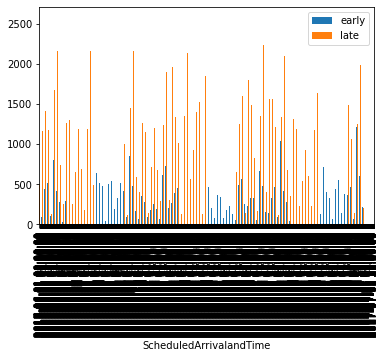

In [ ]:
# %matplotlib inline
# bucket_dt.resample('10T', on='ScheduledArrivalandTime').sum().plot.bar()